
Possibilités d'analyse
Examiner comment différents attributs de voiture (type, kilométrage, équipements, etc.) influencent le prix de location.
Construire un modèle de machine learning pour prédire le prix de location basé sur ces attributs.
Analyser les tendances de prix dans différents segments de voitures ou en fonction de l'équipement pour aider à formuler des stratégies de tarification.

1. Exploration et Préparation des Données
Chargement des données : Importer le fichier CSV pour examiner les types de données et les statistiques descriptives.
Nettoyage des données : Traiter les valeurs manquantes, les anomalies, et éventuellement les valeurs extrêmes qui pourraient affecter la qualité des prédictions.
Ingénierie des caractéristiques : Transformer les variables catégorielles en numériques si nécessaire, et créer de nouvelles variables qui pourraient être utiles pour la prédiction.
2. Sélection des Caractéristiques
Analyser les corrélations entre les caractéristiques et la variable cible (prix de location par jour).
Sélectionner les caractéristiques les plus pertinentes pour le modèle de prédiction.
3. Construction du Modèle
Division des données : Séparer les données en un ensemble d'apprentissage et un ensemble de test.
Choix du modèle : Déterminer le type de modèle de machine learning le plus approprié (régression linéaire, forêts aléatoires, etc.).
Entraînement du modèle : Utiliser l'ensemble d'apprentissage pour entraîner le modèle.
4. Évaluation du Modèle
Validation du modèle : Tester le modèle sur l'ensemble de test pour évaluer sa performance à l'aide de métriques appropriées (RMSE, R², etc.).
Ajustement : Ajuster les paramètres du modèle si nécessaire pour améliorer les performances.
5. Déploiement du Modèle (Bonus)
Endpoint /predict : Créer un endpoint qui accepte les données d'entrée en JSON et renvoie les prédictions en JSON. Cela peut être simulé dans un notebook Jupyter si l'environnement ne permet pas un déploiement réel.

# <u> Part 1 : Import libraries and load the dataset

<u><h4>1.Import useful modules

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

<u><h4>2.Load the data

In [2]:
# Import dataset
print("Loading dataset...")
pricing_data = pd.read_csv("/Users/nadiapreuvot/Desktop/deployment_project/get_around_pricing_project.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
# Display first 5 rows
print(pricing_data.head())

   Unnamed: 0 model_key  mileage  engine_power    fuel paint_color  \
0           0   Citroën   140411           100  diesel       black   
1           1   Citroën    13929           317  petrol        grey   
2           2   Citroën   183297           120  diesel       white   
3           3   Citroën   128035           135  diesel         red   
4           4   Citroën    97097           160  diesel      silver   

      car_type  private_parking_available  has_gps  has_air_conditioning  \
0  convertible                       True     True                 False   
1  convertible                       True     True                 False   
2  convertible                      False    False                 False   
3  convertible                       True     True                 False   
4  convertible                       True     True                 False   

   automatic_car  has_getaround_connect  has_speed_regulator  winter_tires  \
0          False                   True     

In [4]:
# Suppression de la colonne 'Unnamed: 0'
pricing_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#Basics stats
print("Number of rows: {}".format(pricing_data.shape[0]))
print("Number of columns: {}".format(pricing_data.shape[1]))
print()

print ("Dsipaly of dataset: ")
display(pricing_data.head())
print()
print()

print ("Basics statistics: ")
df_desc=pricing_data.describe(include="all")
display(df_desc)
print()

print("Percentage of missing values: ")
display(100*pricing_data.isnull().sum()/pricing_data.shape[0])

Number of rows: 4843
Number of columns: 14

Dsipaly of dataset: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183




Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

</u><ins><center> <font color="bleu"><ins>Basic statistics summary</font> </center>
<li>Categorical and Numerical Variables: You have categorical variables such as model_key, fuel, paint_color, car_type which will likely require encoding to be used in a machine learning model.
<li>Boolean Variables: Features such as private_parking_available, has_gps, has_air_conditioning, automatic_car, has_getaround_connect, has_speed_regulator, winter_tires are boolean (True/False), which is useful for direct modeling without the need for additional transformation.
<li>Target Variable: The rental_price_per_day is your numerical target variable for price prediction.
<li>No Missing Values: It appears that there are no missing values in your dataset, which simplifies data preparation.







# <u> Part 2: EDA, Preprocessing, and Baseline Model

Data visualisation

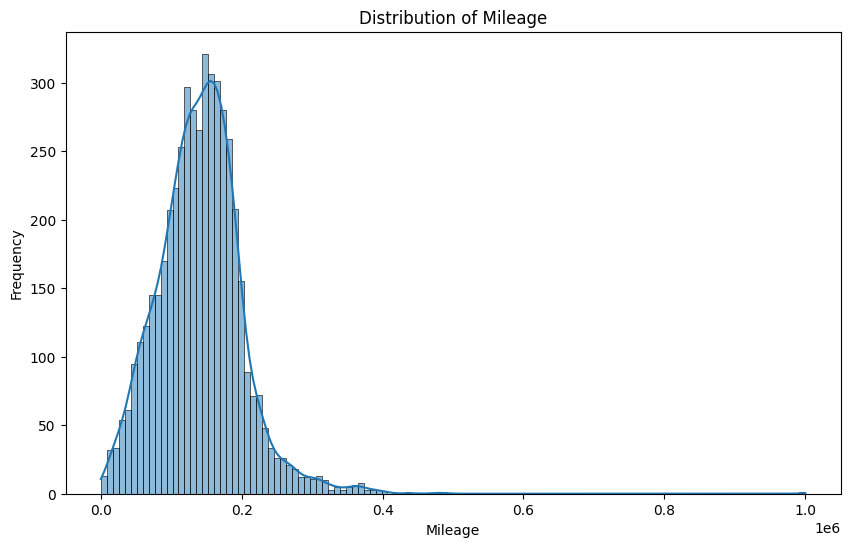

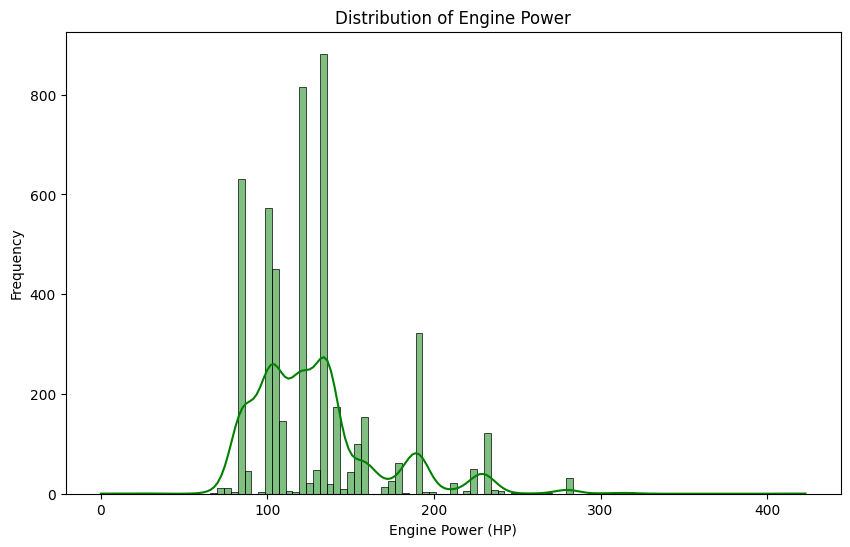

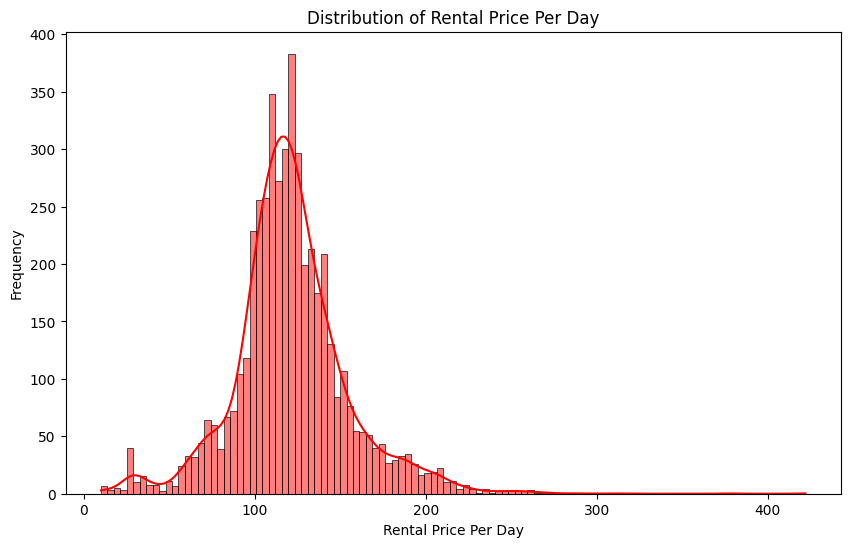

In [6]:
# Histogramme pour 'mileage'
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Histogramme pour 'engine_power'
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['engine_power'], color='green', kde=True)
plt.title('Distribution of Engine Power')
plt.xlabel('Engine Power (HP)')
plt.ylabel('Frequency')
plt.show()

# Histogramme pour 'rental_price_per_day'
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['rental_price_per_day'], color='red', kde=True)
plt.title('Distribution of Rental Price Per Day')
plt.xlabel('Rental Price Per Day')
plt.ylabel('Frequency')
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
- 1. <ins> Mileage Distribution</ins>:

<ins>Shape</ins>: The distribution is clearly right-skewed, indicating that most cars have relatively low mileage, with a few having very high mileage.</br>
<ins>Implication</ins>: Higher mileage may negatively impact the daily rental price as it can be perceived as an indicator of vehicle wear or age.</br>

- 2. <ins>Engine Power Distribution</ins>:

<ins>Shape</ins>: This distribution shows multiple peaks, suggesting that certain engine power ranges are more common than others. These peaks likely correspond to standard engine configurations for specific car categories.</br>
<ins>Implication</ins>: Cars with more powerful engines might be preferred for specific uses, influencing their rental price.</br>

- 3. <ins>Rental Price Per Day Distribution</ins>:

<ins>Shape</ins>: The distribution of daily rental prices shows a pronounced peak and right skewness, indicating that most rentals are priced lower with a few rentals costing significantly more.</br>
<ins>Implication</ins>: This may suggest a market segmentation where most vehicles are economical or standard, with a few premium options available at higher rates.</br>

In [7]:
# Compter les occurrences dans chaque catégorie de retard
category_counts = pricing_data['rental_price_per_day'].value_counts().sort_index()
print(category_counts)

rental_price_per_day
10     7
14     3
20     5
22     2
24     1
      ..
274    1
287    1
309    1
378    1
422    1
Name: count, Length: 220, dtype: int64


/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_3065/721934805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=pricing_data, palette='Set2')


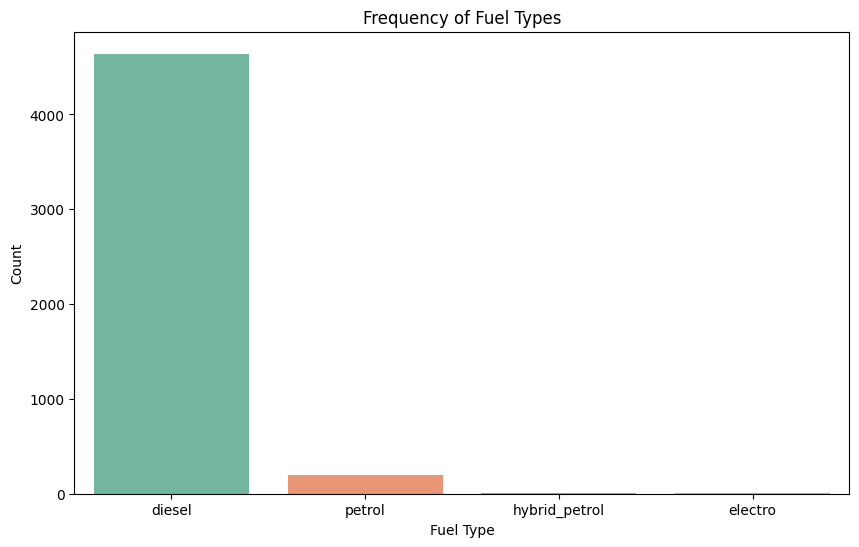

/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_3065/721934805.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='car_type', data=pricing_data, palette='Set1')


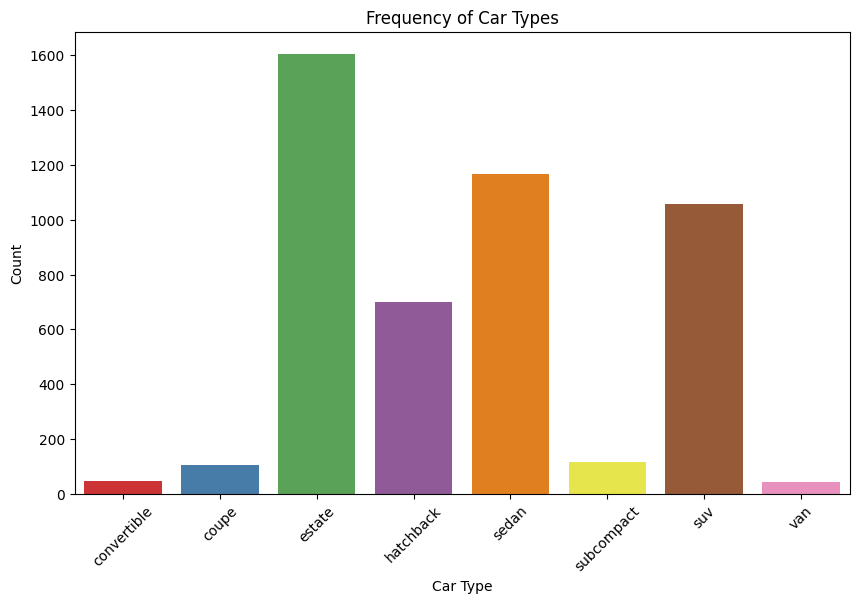

/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_3065/721934805.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='paint_color', data=pricing_data, palette='Set2')


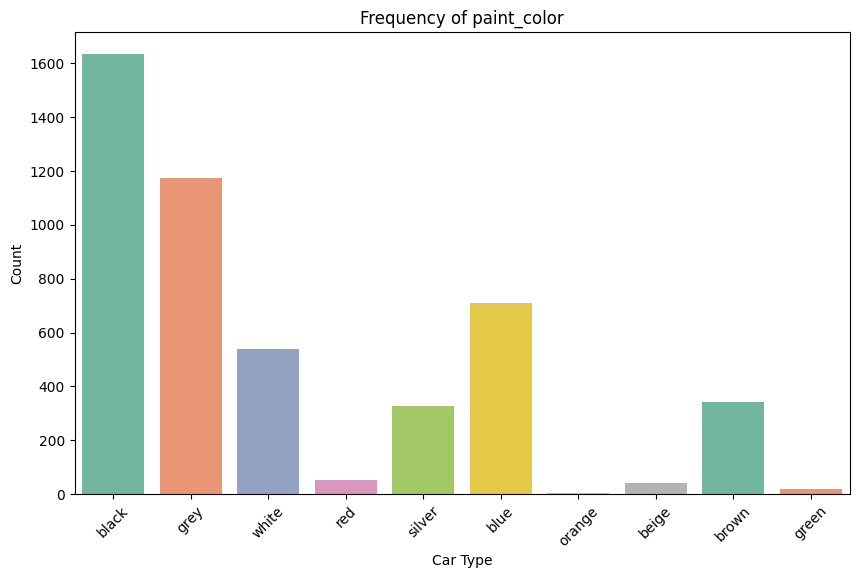

/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_3065/721934805.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='model_key', data=pricing_data, palette='Set3')


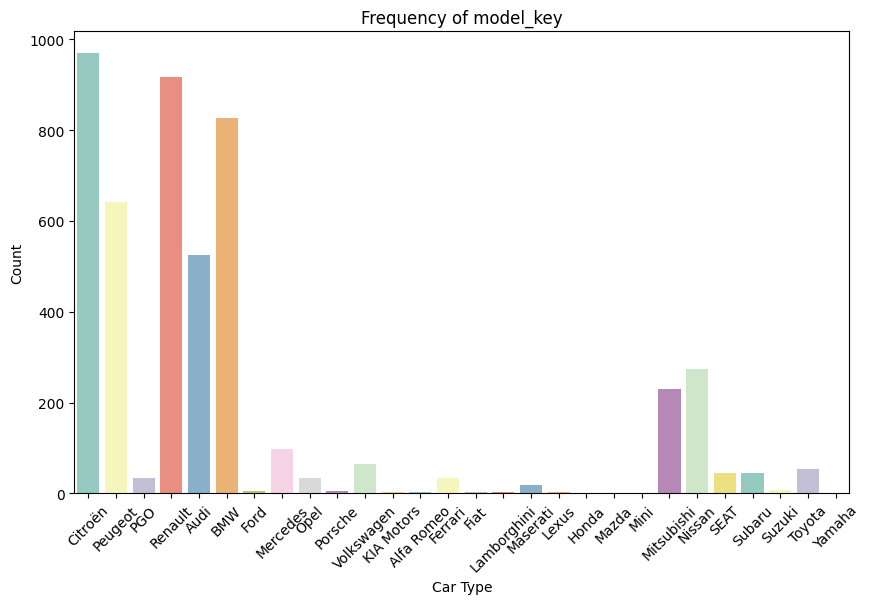

In [8]:
# Diagramme à barres pour 'fuel'
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=pricing_data, palette='Set2')
plt.title('Frequency of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Diagramme à barres pour 'car_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='car_type', data=pricing_data, palette='Set1')
plt.title('Frequency of Car Types')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Diagramme à barres pour 'paint_color'
plt.figure(figsize=(10, 6))
sns.countplot(x='paint_color', data=pricing_data, palette='Set2')
plt.title('Frequency of paint_color')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Diagramme à barres pour 'model_key'
plt.figure(figsize=(10, 6))
sns.countplot(x='model_key', data=pricing_data, palette='Set3')
plt.title('Frequency of model_key')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

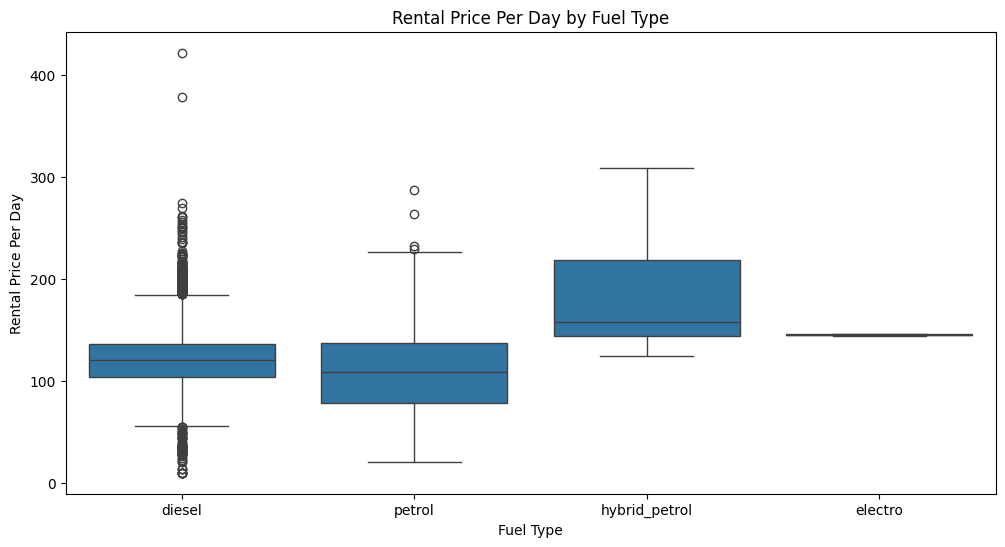

In [9]:
# Boxplot des prix de location par type de carburant
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='rental_price_per_day', data=pricing_data)
plt.title('Rental Price Per Day by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Rental Price Per Day')
plt.show()


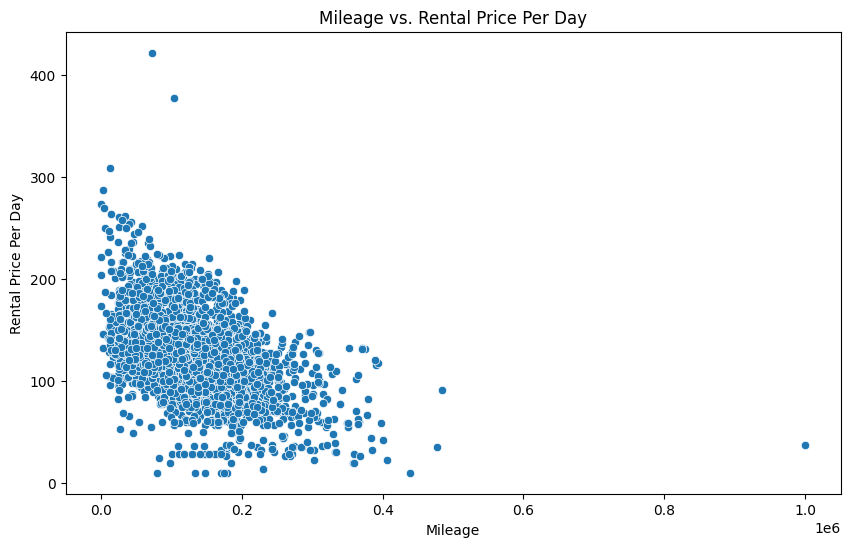

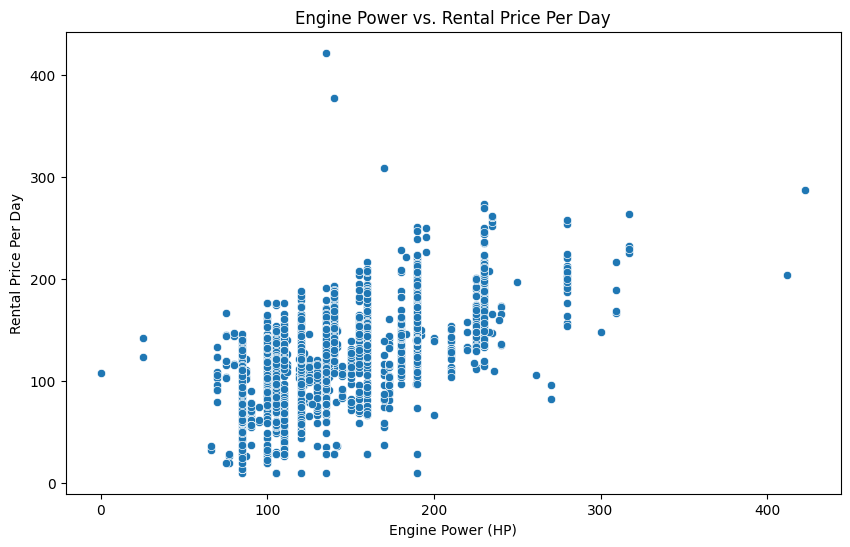

In [10]:
# Scatter plot entre 'mileage' et 'rental_price_per_day'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='rental_price_per_day', data=pricing_data)
plt.title('Mileage vs. Rental Price Per Day')
plt.xlabel('Mileage')
plt.ylabel('Rental Price Per Day')
plt.show()

# Scatter plot entre 'engine_power' et 'rental_price_per_day'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_power', y='rental_price_per_day', data=pricing_data)
plt.title('Engine Power vs. Rental Price Per Day')
plt.xlabel('Engine Power (HP)')
plt.ylabel('Rental Price Per Day')
plt.show()


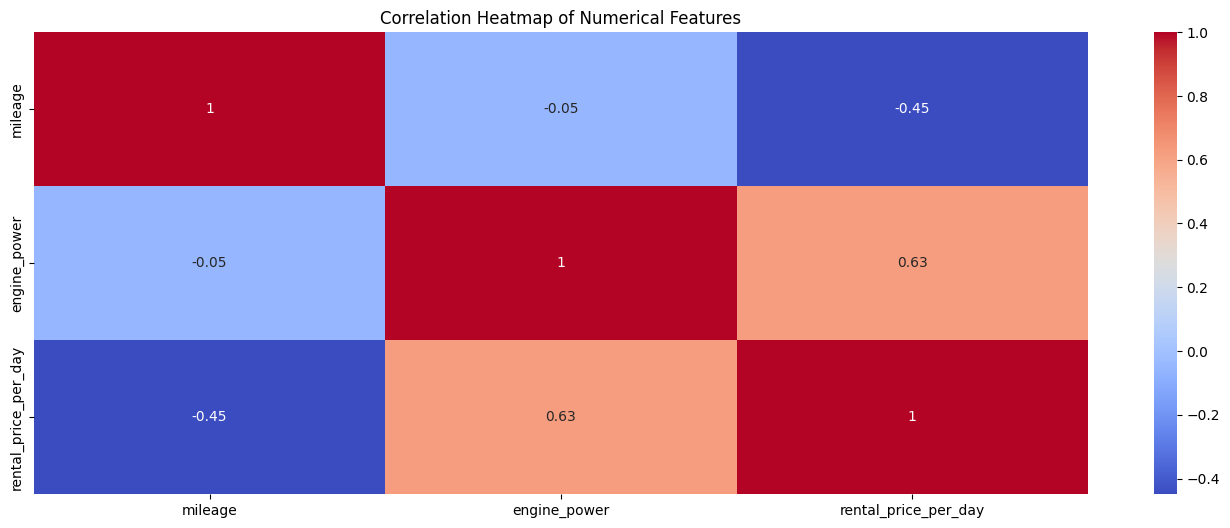

In [11]:
# Sélectionner uniquement les colonnes numériques pour la corrélation
numerical_data = pricing_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

# Créer la heatmap de la matrice de corrélation
plt.figure(figsize=(17, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Notable Correlations:

Engine Power and Rental Price per Day: A moderate positive correlation (0.63) suggests that higher engine power tends to be associated with higher daily rental prices. This might indicate that more powerful cars are typically rented at a higher rate.
Mileage and Engine Power: The weak negative correlation (-0.05) doesn't suggest a strong relationship, which makes sense as mileage and engine power are generally not directly related.

No extreme positive or negative correlations are evident, suggesting there is no immediate redundancy that would require removal to avoid multicollinearity in a predictive model.

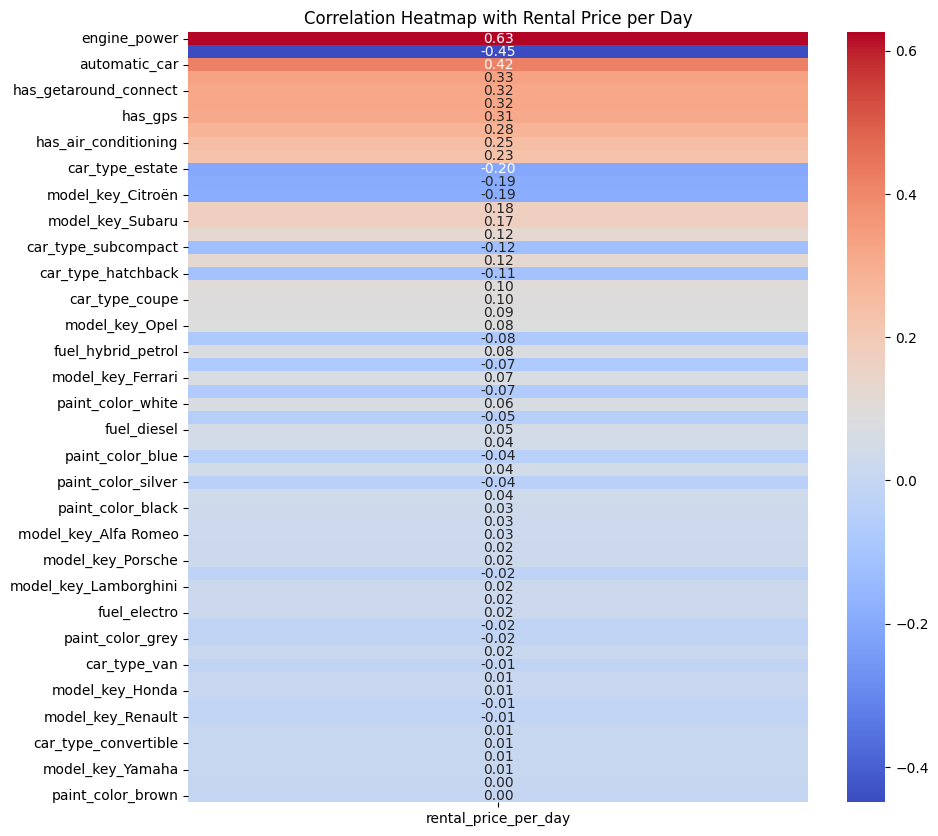

In [12]:
# Encoder les variables catégorielles
encoded_data = pd.get_dummies(pricing_data)

# Calculer la matrice de corrélation
correlation_matrix = encoded_data.corr()

# Sélectionner un sous-ensemble de variables pour la heatmap
# Par exemple, afficher seulement les corrélations avec 'rental_price_per_day'
target_correlation = correlation_matrix[['rental_price_per_day']].drop(['rental_price_per_day'])

# Trier les valeurs par ordre de corrélation avec la variable cible
sorted_correlation = target_correlation.sort_values(by='rental_price_per_day', key=abs, ascending=False)

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 10))  # Ajuster la taille selon le nombre de variables
sns.heatmap(sorted_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Rental Price per Day')
plt.show()


Key Observations:
Engine Power: There's a strong positive correlation (0.63) with rental price per day, indicating that cars with higher engine power tend to have higher rental prices.
Automatic Cars: There is a moderate positive correlation (0.45) suggesting that automatic cars generally rent at higher prices compared to manual cars.
Getaround Connect: This feature has a correlation of 0.33 with rental price, suggesting that cars equipped with Getaround Connect might command higher rental rates.
GPS and Speed Regulator: Both features show positive correlations (0.32 and 0.25, respectively), indicating that these features may also contribute to higher rental prices.
Negative Influences:
Brand and Model Specifics: Several car models show negative correlations with rental price, such as Peugeot and SEAT, indicating that these might be associated with lower rental prices. On the other hand, no specific car brand shows a strong positive correlation with higher rental prices, which suggests that other factors like features or car type might be more influential.


Traitement des valeurs aberrantes

Visualisation des données avec des boxplots

In [13]:
# Création d'une figure avec 1 ligne et 3 colonnes
fig = make_subplots(rows=1, cols=3, subplot_titles=("Mileage", "Engine Power", "Rental Price Per Day"))

# Ajout des boxplots
fig.add_trace(go.Box(y=pricing_data['mileage'], name='Mileage'), row=1, col=1)
fig.add_trace(go.Box(y=pricing_data['engine_power'], name='Engine Power'), row=1, col=2)
fig.add_trace(go.Box(y=pricing_data['rental_price_per_day'], name='Rental Price Per Day'), row=1, col=3)

# Mise à jour des layouts pour une meilleure visualisation
fig.update_layout(height=600, width=1200, title_text="Distribution of Mileage, Engine Power, and Rental Price Per Day")
fig.show()



 Définition des seuils

In [14]:
# Filtrer uniquement les colonnes numériques pour le calcul des quantiles
numeric_data = pricing_data.select_dtypes(include=['float64', 'int64'])

# Calcul des IQR pour chaque variable numérique
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bounds for outlier detection:\n", lower_bound)
print("Upper bounds for outlier detection:\n", upper_bound)


Lower bounds for outlier detection:
 mileage                -5509.5
engine_power              47.5
rental_price_per_day      56.0
dtype: float64
Upper bounds for outlier detection:
 mileage                 283618.5
engine_power               187.5
rental_price_per_day       184.0
dtype: float64


 Traitement des valeurs aberrantes

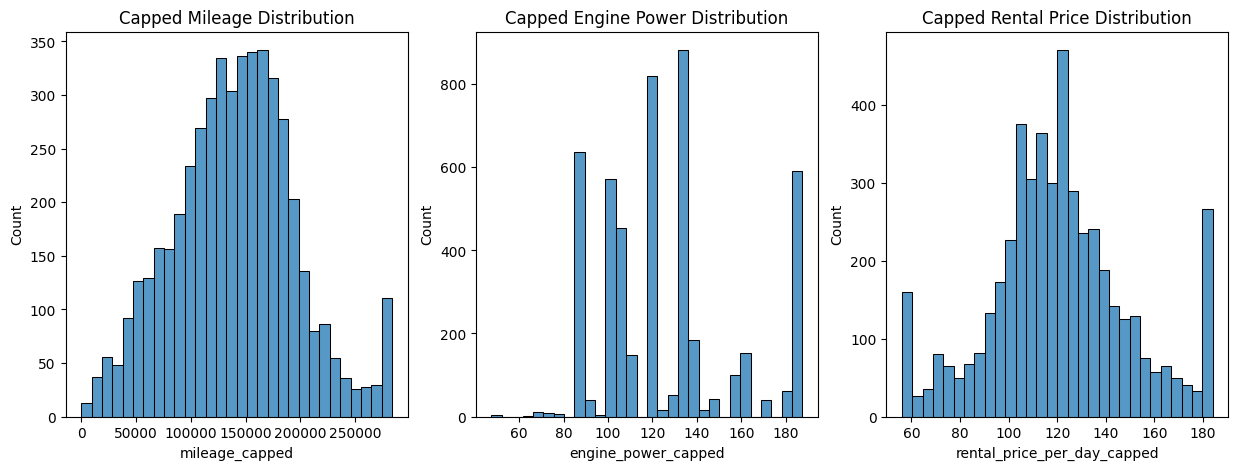

In [15]:
# Application du capping
pricing_data['mileage_capped'] = pricing_data['mileage'].clip(lower=lower_bound['mileage'], upper=upper_bound['mileage'])
pricing_data['engine_power_capped'] = pricing_data['engine_power'].clip(lower=lower_bound['engine_power'], upper=upper_bound['engine_power'])
pricing_data['rental_price_per_day_capped'] = pricing_data['rental_price_per_day'].clip(lower=lower_bound['rental_price_per_day'], upper=upper_bound['rental_price_per_day'])

# Vérification des distributions après capping
plt.figure(figsize=(15, 5))

# Histogramme des valeurs capées pour 'mileage'
plt.subplot(1, 3, 1)
sns.histplot(pricing_data['mileage_capped'], bins=30, kde=False)
plt.title('Capped Mileage Distribution')

# Histogramme des valeurs capées pour 'engine_power'
plt.subplot(1, 3, 2)
sns.histplot(pricing_data['engine_power_capped'], bins=30, kde=False)
plt.title('Capped Engine Power Distribution')

# Histogramme des valeurs capées pour 'rental_price_per_day'
plt.subplot(1, 3, 3)
sns.histplot(pricing_data['rental_price_per_day_capped'], bins=30, kde=False)
plt.title('Capped Rental Price Distribution')

plt.show()



By applying capping, we have effectively normalized the distribution of these variables, which can enhance the performance of machine learning models by reducing the leverage of outliers. <br/>
This step is crucial in data preparation for modeling, ensuring that the models are not unduly influenced by atypical values that do not represent the majority of the data.

In [16]:
# Afficher les types de données pour chaque colonne
print(pricing_data.dtypes)

# Afficher les premières lignes du DataFrame pour inspecter visuellement les données
print(pricing_data.head())

# Optionnellement, afficher des statistiques descriptives pour les colonnes numériques
print(pricing_data.describe())

# Vérifier les valeurs uniques pour les colonnes catégorielles pour s'assurer qu'elles sont bien encodées
for col in pricing_data.select_dtypes(include=['object', 'bool']).columns:
    print(f"Unique values in {col}: {pricing_data[col].unique()}")


model_key                       object
mileage                          int64
engine_power                     int64
fuel                            object
paint_color                     object
car_type                        object
private_parking_available         bool
has_gps                           bool
has_air_conditioning              bool
automatic_car                     bool
has_getaround_connect             bool
has_speed_regulator               bool
winter_tires                      bool
rental_price_per_day             int64
mileage_capped                 float64
engine_power_capped            float64
rental_price_per_day_capped      int64
dtype: object
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  die

In [17]:
# Replace original columns with capped versions
pricing_data['mileage'] = pricing_data['mileage_capped']
pricing_data['engine_power'] = pricing_data['engine_power_capped']
pricing_data['rental_price_per_day'] = pricing_data['rental_price_per_day_capped']

In [18]:
# Optionally drop the capped columns if you want to keep the naming consistent
pricing_data.drop(columns=['mileage_capped', 'engine_power_capped', 'rental_price_per_day_capped'], inplace=True)

Baseline model : simple linear regression

In [19]:
#separate target variable Y from features X
target_variable= "rental_price_per_day"

print('Separating labels from features...')

Y= pricing_data.loc[ : , target_variable]
X= pricing_data.drop(target_variable , axis =1)

print("...Done")
print()

print("Y: ")
print(Y.head())
print()
print("X: ")
X.head()

Separating labels from features...
...Done

Y: 
0    106
1    184
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,Citroën,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True
1,Citroën,13929.0,187.5,petrol,grey,convertible,True,True,False,False,False,True,True
2,Citroën,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True
3,Citroën,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True
4,Citroën,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True


In [20]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [21]:
#Preprocessing with Scikit-Learn
print ("Dividing into train and test sets ...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )
print("...Done.")
print()

Dividing into train and test sets ...
...Done.



Preprocessing

In [22]:
#Create pipeline for numeric features

numeric_transformer = Pipeline(steps =[("scaler", StandardScaler())])

#Create pipeline for categorical features

categorical_transformer = Pipeline(steps =[("encoder" , OneHotEncoder( drop = "first", handle_unknown='ignore')) ])
# first column will be dropped to avoid creating correlations between features
# Gérer les catégories inconnues de manière sécurisée


#Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

#Preprocessing on train set

print("Performing preprocessings on train set...")
print()
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()
print()

# Preprocessings on test set

print("Performing preprocessings on test set...")
print()
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print(X_test)
print()


Performing preprocessings on train set...

     model_key   mileage  engine_power    fuel paint_color car_type  \
1215   Renault  119515.0         135.0  diesel        grey   estate   
432    Citroën  234365.0         135.0  diesel       black   estate   
4244       BMW   77356.0         105.0  diesel       black      suv   
289    Peugeot  181297.0         105.0  diesel       brown   estate   
2585   Citroën  144089.0         137.0  petrol       black    sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1215                      False     True                 False          False   
432                        True     True                 False          False   
4244                      False     True                 False          False   
289                       False     True                 False          False   
2585                       True     True                 False          False   

      has_getaround_connect  has_speed_regu

Train model

In [23]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


Performance assessment

In [24]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[131.47596678  97.894519   127.34499004 ... 153.02781969 137.32181013
 141.51531022]



Le modèle a généré des prédictions sur l'ensemble d'entraînement, ce qui signifie que nous pouvons maintenant évaluer la performance de notre modèle sur ces données. Les prédictions sont affichées sous forme d'un tableau de valeurs numériques, chacune correspondant à la prédiction du modèle pour chaque observation dans l'ensemble d'entraînement.

In [25]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[141.53570403 111.4611866  152.02287034 116.20691624 128.73760141
  81.87986373 100.33374488 132.90318299 145.9806719  112.27602127
 101.57869221 111.16514098 104.86291789 142.23945352 125.98701169
 108.10391066 151.30548038 169.3405243   91.96630302 133.2570126
 183.82591935 113.86086235 105.64485499 138.29127177 106.80518976
  83.35094244  97.40559394  99.45685152 118.26046233 128.48740442
  89.55974862  94.43582974 108.88410856 101.28504405 132.39056682
 123.27456222 121.53241808 127.63830237 111.92393284 177.52985366
 113.81012967 134.11837791 140.66953808 101.00279518 146.91290872
  96.80073025 122.80640519 154.4266768  113.90784481  96.62220535
 125.43345882  96.23217191 100.39403269 173.03116957  99.74300657
  91.26059388 179.28805532 119.6924185  150.56687081 111.30435491
 135.69109043 143.80794226 140.57791545 100.20708876  91.74505561
 123.36764644 133.8645799  107.26335349 106.73430156 101.40300124
 119.96096165 101.13798509 157.5984195  1

In [26]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7402301894348575
R2 score on test set :  0.7150395029388549


The R² scores we've calculated indicate the proportion of variance in the target variable (rental price per day) that can be predicted from the model's independent features. Here's what these scores mean in your case:

R² on the training set (0.7406): This score suggests that our model explains about 74.06% of the variance in the rental price per day within the training data. This is an indicator that the model performs relatively well and captures a significant portion of the variations in the training data.

R² on the test set (0.7093): This score is slightly lower than that of the training set, explaining about 70.93% of the variance. It indicates that the model also performs quite well on new, unseen data, which is a good sign of generalization. However, the slight drop from the training set might also signal a beginning of overfitting, although the difference is not very large.



In [27]:
# Calcul des métriques de performance
print( "Mean Squared Error on training set:",mean_squared_error(Y_train, Y_train_pred))
print( "Mean Squared Error on test set:",mean_squared_error(Y_test, Y_test_pred))

print( "Root Mean Squared Error: on training set:",np.sqrt(Y_train, Y_train_pred))
print( "Root Mean Squared Error: on test set:",np.sqrt(Y_test, Y_test_pred))

print( "Mean Absolute Error on training set:",mean_absolute_error(Y_train, Y_train_pred))
print( "Mean Absolute Error on training set:",mean_absolute_error(Y_test, Y_test_pred))

Mean Squared Error on training set: 218.38538345355676
Mean Squared Error on test set: 230.21133203036334
Root Mean Squared Error: on training set: 1215    11.874342
432     11.269428
4244    12.288206
289     10.723805
2585    10.583005
          ...    
4426    10.148892
466     11.313708
3092    13.564660
3772    12.000000
860     11.661904
Name: rental_price_per_day, Length: 3874, dtype: float64
Root Mean Squared Error: on test set: 3203    12.328828
1957    10.954451
1044    12.569805
2732    10.488088
1538    12.165525
          ...    
4141    10.908712
1983    10.440307
1507    10.954451
1126    10.816654
180     10.344080
Name: rental_price_per_day, Length: 969, dtype: float64
Mean Absolute Error on training set: 109.84417445844288
Mean Absolute Error on training set: 109.5095456271327


In [28]:
# Calcul des métriques de performance
mse = mean_squared_error(Y_train, Y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_train, Y_train_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)



# Calcul des métriques de performance pour l'ensemble de test
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, Y_test_pred)


print("Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("Mean Absolute Error:", mae_test)



Mean Squared Error: 12830.675141700403
Root Mean Squared Error: 113.27257012048594
Mean Absolute Error: 109.84417445844288
Test Set Metrics:
Mean Squared Error: 12727.143418229067
Root Mean Squared Error: 112.81464186101495
Mean Absolute Error: 109.5095456271327


The results indicate that the performance metrics of our model are quite consistent between the training and test sets. Here are some key observations based on the values provided:

Model Stability: The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are very close between the training and test sets, suggesting that your model generalizes well to new data. This is a good sign, as it does not indicate significant overfitting.

Mean Absolute Error (MAE): The MAE is also similar between the sets, indicating that the average errors in terms of price are stable, even when the model is applied to unseen data.

Consideration of Error Scale: Although the errors (MSE, RMSE, and MAE) are consistent, they are relatively high compared to the potential values of rental prices (though this depends on the price scale in your data). This may suggest that the model could benefit from improvement, either through parameter tuning or by using more complex modeling techniques.

In [29]:
# Perform grid search
print("Grid search...")

lasso = Lasso(max_iter=10000, tol=0.01) # quand l'algo doit s'arreter
# Grid of values to be tested
params = {
    'alpha': [0.001, 0.01, 0.1, 1]
}
gridsearch_lasso = GridSearchCV(lasso, param_grid=params, cv=5, scoring='r2', verbose=1) 
gridsearch_lasso.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)

# Performance assessment, Print R^2 scores
print("R2 score on training set : ", gridsearch_lasso.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_lasso.score(X_test, Y_test))

Grid search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
...Done.
Best hyperparameters :  {'alpha': 0.001}
Best R2 score :  0.7281737441057886
R2 score on training set :  0.7401871848636915
R2 score on test set :  0.7148912454760044


In [30]:
# Perform grid search
print("Grid search...")

ridge = Ridge (max_iter=10000, tol=0.01) # quand l'algo doit s'arrêter
# Grid of values to be tested
params = {
    'alpha': [0.001, 0.01, 0.1, 1]
}
gridsearch_ridge = GridSearchCV(ridge, param_grid=params, cv=5, scoring='r2', verbose=1) 
gridsearch_ridge.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)

# Performance assessment, Print R^2 scores
print("R2 score on training set : ", gridsearch_ridge.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_ridge.score(X_test, Y_test))

Grid search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
...Done.
Best hyperparameters :  {'alpha': 0.001}
Best R2 score :  0.7281737441057886
R2 score on training set :  0.7328856525231298
R2 score on test set :  0.7136996145403909


random forest

In [31]:
# Perform grid search
print("Grid search...")
RandomForest = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [None,6, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [20, 40, 60, 100]
}
gridsearch = GridSearchCV(RandomForest, param_grid = params, cv = 3)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best validation accuracy :  0.7586899820474445


The Random Forest model achieved a validation accuracy of 0.7587 with the best hyperparameters: max_depth of 30, min_samples_leaf of 1, min_samples_split of 2, and n_estimators of 100. These parameters indicate a model that is complex and detailed, designed to capture subtle patterns in the data. It's important to evaluate the model on unseen test data to ensure it generalizes well and doesn't just fit the training data too closely. Further tuning might be required to balance model complexity with generalization.£